In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df =  pd.read_csv("Restaurant_revenue (1).csv")

In [4]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

<Axes: >

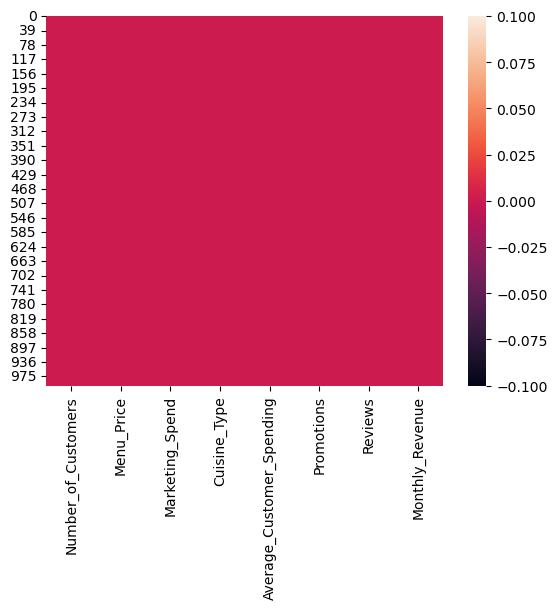

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.head()

Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                   61   43.117635        12.663793     Japanese   
1                   24   40.020077         4.577892      Italian   
2                   81   41.981485         4.652911     Japanese   
3                   70   43.005307         4.416053      Italian   
4                   30   17.456199         3.475052      Italian   

   Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                  36.236133           0       45       350.912040  
1                  17.952562           0       36       221.319091  
2                  22.600420           1       91       326.529763  
3                  18.984098           1       59       348.190573  
4                  12.766143           1       30       185.009121

[Text(0.5, 1.0, 'Menu price according to Cusine type')]

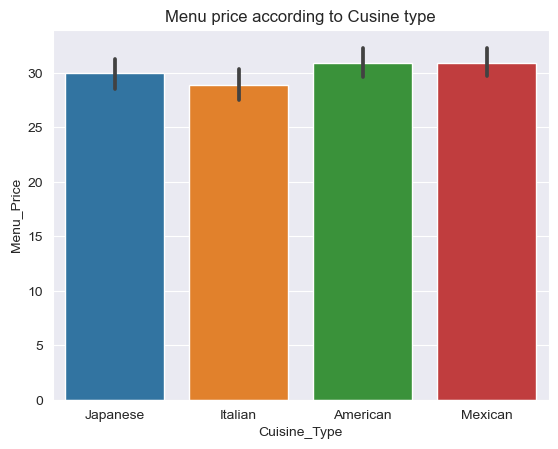

In [11]:
# menu price according to the cusine type 
sns.set_style('darkgrid')
sns.barplot(x = 'Cuisine_Type' , y ='Menu_Price' , data  =  df).set(title =  "Menu price according to Cusine type")

C:\Users\Shailendra Singh\AppData\Local\Temp\ipykernel_15484\395712275.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax =  sns.barplot(x = 'Cuisine_Type' , y =  'Number_of_Customers' , data =  df , estimator=sum, ci=None, hue='Cuisine_Type')


[Text(0.5, 1.0, 'NUmber of customer according to the cusine type')]

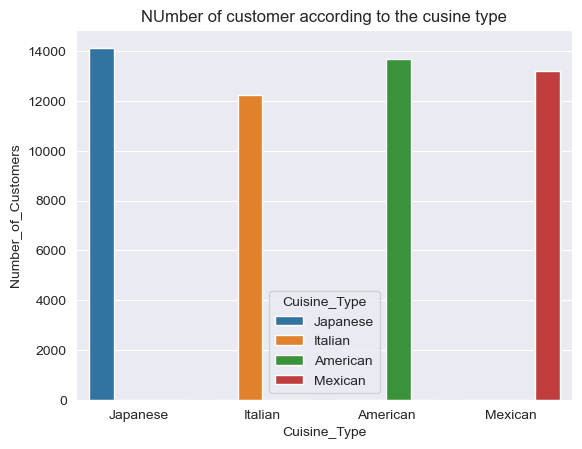

In [20]:
# number of customer according to the cusine type 

sns.set_style("darkgrid")
ax =  sns.barplot(x = 'Cuisine_Type' , y =  'Number_of_Customers' , data =  df , estimator=sum, ci=None, hue='Cuisine_Type')
ax.set(title  =  "NUmber of customer according to the cusine type")

# As per the given data the chinese cusine  restraunt has the maximum number of the customer as compared to the other type of the cusine type 

C:\Users\Shailendra Singh\AppData\Local\Temp\ipykernel_15484\673390056.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(x='Cuisine_Type' , y = 'Average_Customer_Spending' , data =  df ,estimator=sum , ci=None , hue='Cuisine_Type')


[Text(0.5, 1.0, 'Customer spending maximum on which type of the cusine')]

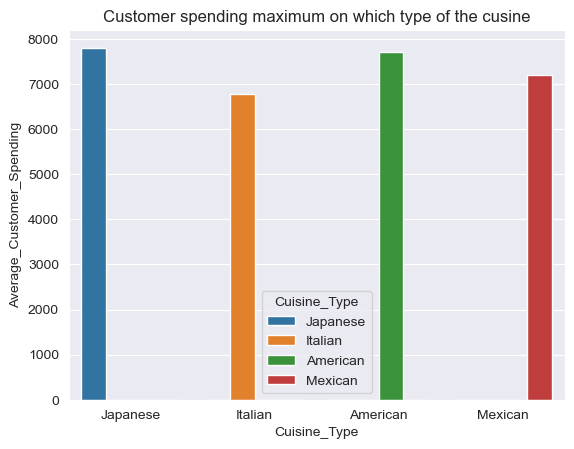

In [23]:
# customer spending the maximum on which type of the cusine 

sns.set_style("darkgrid")
ax1 = sns.barplot(x='Cuisine_Type' , y = 'Average_Customer_Spending' , data =  df ,estimator=sum , ci=None , hue='Cuisine_Type')
ax1.set(title = 'Customer spending maximum on which type of the cusine')

The preference of the customer was Japanese   and american as compare to all type of cuisine present in the data set 

C:\Users\Shailendra Singh\AppData\Local\Temp\ipykernel_15484\1512388380.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 =  sns.barplot(x ='Cuisine_Type' , y =  'Marketing_Spend' , data = df  , hue='Cuisine_Type' , ci=None  , estimator=sum)


[Text(0.5, 1.0, 'marketing spend VS Cuisine type')]

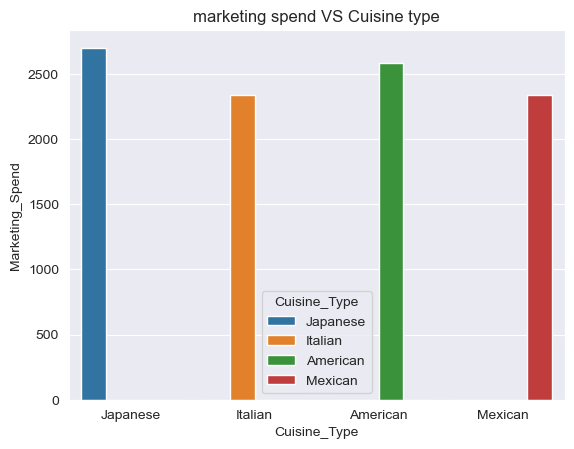

In [26]:
# finidng out which cusine spending most on the marketing

sns.set_style("darkgrid")
ax2 =  sns.barplot(x ='Cuisine_Type' , y =  'Marketing_Spend' , data = df  , hue='Cuisine_Type' , ci=None  , estimator=sum)
ax2.set(title  =  "marketing spend VS Cuisine type")

#The japanese restraunt spend more money as compared to the other cusne type thats why they have the most customer spending there money on the japanese cuisine as compare to the other type of the cusine and also the price of their dishes was low . 
According to my analysis that was the reason that japanese cusine has more customer as compared to the Italian american and mexican 

# Data preparation for the machine learning 

In [31]:
# Aanlysis before applying the machine learning algorithm 
df['Cuisine_Type'].unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [34]:
# for applying going to convert the Categorical data into the numerical data 
# japanese  =  0 , Italian -  1 ,  American=  2 ,Mexican-3 

df['Cuisine_Type']=  df['Cuisine_Type'].map({'Japanese':0, 'Italian':1, 'American':2, 'Mexican':3})


In [38]:
df['Cuisine_Type'].unique()

# sucessfully converted that data into the numerical form 

array([0, 1, 2, 3], dtype=int64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   int64  
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [42]:
# extractind te list of all columns which was in float 
float_columns = df.select_dtypes(include='float').columns.tolist()

print("Columns with float data type:", float_columns)

Columns with float data type: ['Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Monthly_Revenue']


In [44]:
# now converting the all columns into the int at once 
columns_to_int =  ['Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Monthly_Revenue']
df[columns_to_int] = df[columns_to_int].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Number_of_Customers        1000 non-null   int64
 1   Menu_Price                 1000 non-null   int32
 2   Marketing_Spend            1000 non-null   int32
 3   Cuisine_Type               1000 non-null   int64
 4   Average_Customer_Spending  1000 non-null   int32
 5   Promotions                 1000 non-null   int64
 6   Reviews                    1000 non-null   int64
 7   Monthly_Revenue            1000 non-null   int32
dtypes: int32(4), int64(4)
memory usage: 47.0 KB


# now all the columns is coverted into the int  & now i am doing all the thing that is necessary for the machine learning process 

In [49]:
# Prediction part
# importing the necessary module for the prediction part 
from sklearn.model_selection import train_test_split

In [50]:
X =  df.drop('Monthly_Revenue' , axis=1)
Y =  df['Monthly_Revenue']

In [53]:
X_train , X_test , Y_train , Y_Test =  train_test_split(X , Y, test_size=0.2)

In [54]:
print("The shape of the X_train is" , X_train.shape)
print("The shape of the X_test is" , X_test.shape)
print("The shape of the Y_train is" , Y_train.shape)
print("The shape of the Y_Test is" , Y_Test.shape)

The shape of the X_train is (800, 7)
The shape of the X_test is (200, 7)
The shape of the Y_train is (800,)
The shape of the Y_Test is (200,)


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model1 =  LinearRegression()
model1.fit(X_train   , Y_train)

LinearRegression()

In [57]:
model1.score(X_test , Y_Test)

0.7399188883240724

In [58]:
from sklearn.ensemble import RandomForestRegressor

model2 =  RandomForestRegressor()
model2.fit(X_train , Y_train)

RandomForestRegressor()

In [59]:
model2.score(X_test , Y_Test)

0.7015022001954989

In [60]:
from sklearn.tree import DecisionTreeRegressor
model3 =  DecisionTreeRegressor()
model3.fit(X_train , Y_train)

DecisionTreeRegressor()

In [61]:
model3.score(X_test , Y_Test)

0.3729800293775565

In [66]:
X.head()

Number_of_Customers  Menu_Price  Marketing_Spend  Cuisine_Type  \
0                   61          43               12             0   
1                   24          40                4             1   
2                   81          41                4             0   
3                   70          43                4             1   
4                   30          17                3             1   

   Average_Customer_Spending  Promotions  Reviews  
0                         36           0       45  
1                         17           0       36  
2                         22           1       91  
3                         18           1       59  
4                         12           1       30

In [70]:
new_data = pd.DataFrame({
    'Number_of_Customers': [61],
    'Menu_Price': [43],
    'Marketing_Spend': [12],
    'Cuisine_Type': [0],
    'Average_Customer_Spending': [36],
    'Promotions': [0],
    'Reviews': [45]
})

predictions = model1.predict(new_data)
print("The predicted value accorind to model 1 acuracy are" , predictions)

# 0	61	43	12	0	36	0	45	 this is the value according to the data 350 and the 331 approx is the predicted value according to my model that i create 

The predicted value accorind to model 1 acuracy are [330.9702993]


In [69]:
df.head()

Number_of_Customers  Menu_Price  Marketing_Spend  Cuisine_Type  \
0                   61          43               12             0   
1                   24          40                4             1   
2                   81          41                4             0   
3                   70          43                4             1   
4                   30          17                3             1   

   Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                         36           0       45              350  
1                         17           0       36              221  
2                         22           1       91              326  
3                         18           1       59              348  
4                         12           1       30              185

In [72]:
predictions2 = model2.predict(new_data)
print("The predicted value accorind to model 2 acuracy are" , predictions2)

# Revenue price predicted by the random forest algorithm 

The predicted value accorind to model 2 acuracy are [353.91]


In [73]:


predictions3 = model3.predict(new_data)
print("The predicted value accorind to model 3  acuracy are" , predictions3)


The predicted value accorind to model 1 acuracy are [350.]


In [75]:
# 70	43	4	1	18	1	59

new_data1 = pd.DataFrame({
    'Number_of_Customers': [70],
    'Menu_Price': [43],
    'Marketing_Spend': [4],
    'Cuisine_Type': [1],
    'Average_Customer_Spending': [18],
    'Promotions': [1],
    'Reviews': [59]
})

predictions4 = model3.predict(new_data1
                             )
print("The predicted value accorind to model 3  acuracy are" , predictions4)


The predicted value accorind to model 3  acuracy are [348.]
